In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cost_mu, cost_sigma = 500, 0.5

def A(t):
    return np.random.normal(cost_mu, cost_sigma)

def B(t):
    return cost_mu + cost_sigma*3 *np.sin(t/20)

def C(t):
    return cost_mu + cost_sigma*3 *np.cos(t/20)

In [3]:
def getRewards(prices_arr):
    k = [None] * len(prices_arr) 
    for i in range(len(prices_arr)):
        if prices_arr[i] == min(prices_arr):
            k[i] = 1
        #elif prices_arr[i] == max(prices_arr):
            #k[i] = 0
        else:
            k[i] = 0.5
    return k

def bestActionAccumulatedReward(prices_arr):
    return np.max(np.sum(rewards,axis=0))

In [4]:
T = 1000
K = 3

weight=[1,1,1]
prob=[[1] * K for x in range(0,T+2)] # 0: use origin, 1: use card

rewards=[[0,0,0]]

rewards_exp3 = [0]
regrets_exp3 = [0]

actions_exp3=[-1]

gamma = 0.1

z=[]
z_weight=[]

best_action_accumulated_reward = 0

for i in range(1,T+1):
    rewards.append(getRewards([A(i), B(i), C(i)]))
    best_action_accumulated_reward = bestActionAccumulatedReward(rewards[i])
    
    # exp3
    for arm in range(K):
        prob[i][arm] = (1 - gamma)*(weight[arm])/np.sum(weight) + gamma/K
        
    prob[i]=prob[i]/np.sum(prob[i]) 
    print((1 - gamma)*(weight[arm])/np.sum(weight),gamma/K,prob[i])
        
    draw = int(np.random.choice([0,1,2], 1, p=np.array(prob[i]/np.sum(prob[i])) )) # normolize
    
    actions_exp3.append(draw)
    observed_reward = rewards[i][draw]

    rewards_exp3.append(observed_reward) # play arm, get a reward
               
    weak_regret = best_action_accumulated_reward - sum(rewards_exp3) # weak_regret >= 0
    #print(best_action_accumulated_reward -sum(rewards_exp3),"action:", draw)
        
    regrets_exp3.append(weak_regret) # observe a regret

    x = rewards_exp3[i] / prob[i][draw]
    weight[draw] = weight[draw]*np.exp(gamma*x/K)
    weight= weight / np.sum(weight)
    
    #print(weight)
    
    z.append({"t": i, "reward": rewards_exp3[i], "regret": weak_regret,
              "action": draw, "action_group": chr(draw+65) ,"method": "exp3"})
    
    for arm in range(K):
        z_weight.append({"t": i, "weight": weight[arm], "legend": chr(int(arm)+65)})

df=pd.DataFrame(z)
df_weight=pd.DataFrame(z_weight)

0.3 0.03333333333333333 [0.33333333 0.33333333 0.33333333]
0.5 action: 2
[0.32773227 0.32773227 0.34453546]
0.31008191565218546 0.03333333333333333 [0.32829238 0.32829238 0.34341525]
1.0 action: 1
[0.32223247 0.33901386 0.33875368]
0.304878309700866 0.03333333333333333 [0.32334255 0.3384458  0.33821164]
0.5 action: 1
[0.31130899 0.36142087 0.32727014]
0.2945431265678823 0.03333333333333333 [0.31351142 0.35861212 0.32787646]
0.5 action: 0
[0.33454843 0.34922495 0.31622662]
0.28460395566194746 0.03333333333333333 [0.33442692 0.34763579 0.31793729]
1.0 action: 1
[0.32890744 0.360198   0.31089456]
0.2798051029043243 0.03333333333333333 [0.32935003 0.35751154 0.31313844]
1.0 action: 0
[0.35162106 0.34800684 0.3003721 ]
0.2703348944456072 0.03333333333333333 [0.34979228 0.34653949 0.30366823]
1.0 action: 0
[0.37364138 0.33618779 0.29017083]
0.2611537474288537 0.03333333333333333 [0.36961058 0.33590234 0.29448708]
1.0 action: 0
[0.39497636 0.32473658 0.28028705]
0.2522583477819952 0.033333333

0.1427070833050506 0.03333333333333333 [0.52819695 0.29576263 0.17604042]
5.5 action: 1
[0.54070875 0.30336351 0.15592775]
0.14033497125050481 0.03333333333333333 [0.51997121 0.30636049 0.1736683 ]
5.5 action: 1
[0.53169085 0.31498196 0.15332719]
0.13799447548239083 0.03333333333333333 [0.5118551  0.31681709 0.17132781]
5.5 action: 0
[0.5397894  0.30953492 0.15067568]
0.13560811330005598 0.03333333333333333 [0.51914379 0.31191476 0.16894145]
6.0 action: 0
[0.54775375 0.30417814 0.14806811]
0.1332612951313745 0.03333333333333333 [0.52631171 0.30709366 0.16659463]
6.5 action: 1
[0.53861633 0.31578559 0.14559809]
0.13103827981946567 0.03333333333333333 [0.51808803 0.31754036 0.16437161]
7.0 action: 0
[0.54660014 0.31032121 0.14307865]
0.12877078496993563 0.03333333333333333 [0.52527346 0.31262242 0.16210412]
7.5 action: 0
[0.55445134 0.3049476  0.14060106]
0.12654095206249436 0.03333333333333333 [0.53233954 0.30778617 0.15987429]
8.0 action: 1
[0.54520026 0.31654462 0.13825511]
0.12442960

3.5 action: 0
[0.65021073 0.29793983 0.05184944]
0.04666449947090391 0.03333333333333333 [0.61852299 0.30147918 0.07999783]
3.5 action: 2
[0.64249442 0.29440406 0.06310152]
0.05679136556697627 0.03333333333333333 [0.61157831 0.29829699 0.0901247 ]
3.5 action: 2
[0.63436316 0.29067815 0.0749587 ]
0.06746282561665967 0.03333333333333333 [0.60426017 0.29494367 0.10079616]
4.0 action: 0
[0.64073667 0.28561126 0.07365207]
0.06628686356300185 0.03333333333333333 [0.60999633 0.29038347 0.0996202 ]
4.0 action: 1
[0.63010532 0.29746467 0.07243001]
0.06518700691339505 0.03333333333333333 [0.60042812 0.30105154 0.09852034]
4.0 action: 2
[0.61225114 0.28903594 0.09871292]
0.08884163028797143 0.03333333333333333 [0.58435936 0.29346568 0.12217496]
4.5 action: 1
[0.60208188 0.30084479 0.09707334]
0.08736600373483545 0.03333333333333333 [0.57520702 0.30409364 0.12069934]
5.0 action: 0
[0.60900275 0.29561228 0.09538497]
0.08584647250951456 0.03333333333333333 [0.58143581 0.29938439 0.11917981]
5.5 acti

0.09345337242808234 0.03333333333333333 [0.41859037 0.45462293 0.12678671]
12.5 action: 1
[0.42070972 0.47723701 0.10205327]
0.0918479470630461 0.03333333333333333 [0.41197208 0.46284664 0.12518128]
13.0 action: 0
[0.4305997  0.46908934 0.10031096]
0.09027986461409666 0.03333333333333333 [0.42087307 0.45551374 0.1236132 ]
13.5 action: 1
[0.42320161 0.47821086 0.09858753]
0.08872877572443108 0.03333333333333333 [0.41421479 0.4637231  0.12206211]
14.0 action: 1
[0.41592298 0.4871851  0.09689192]
0.0872027305429839 0.03333333333333333 [0.40766401 0.47179992 0.12053606]
14.5 action: 0
[0.42588767 0.47887344 0.09523889]
0.08571500071418091 0.03333333333333333 [0.41663224 0.46431943 0.11904833]
15.0 action: 0
[0.43569655 0.47069175 0.09361171]
0.08425053509786547 0.03333333333333333 [0.42546023 0.45695591 0.11758387]
15.5 action: 0
[0.44535097 0.46263889 0.09201014]
0.08280912933219602 0.03333333333333333 [0.43414921 0.44970833 0.11614246]
16.0 action: 1
[0.43770532 0.47186414 0.09043054]
0.

21.0 action: 1
[0.34339191 0.56291057 0.09369752]
0.08432777240821461 0.03333333333333333 [0.34238605 0.53995285 0.11766111]
21.0 action: 2
[0.33856457 0.55499729 0.10643814]
0.09579432717727875 0.03333333333333333 [0.33804145 0.53283089 0.12912766]
20.5 action: 0
[0.36098528 0.53618451 0.1028302 ]
0.09254718184296556 0.03333333333333333 [0.35822009 0.5158994  0.12588052]
20.5 action: 1
[0.35474014 0.54420865 0.10105121]
0.0909460905880228 0.03333333333333333 [0.35259946 0.52312112 0.12427942]
20.0 action: 0
[0.37666413 0.52571808 0.0976178 ]
0.08785601658746368 0.03333333333333333 [0.37233105 0.5064796  0.12118935]
20.0 action: 1
[0.37015403 0.53391536 0.09593061]
0.08633755200865854 0.03333333333333333 [0.36647196 0.51385715 0.11967089]
20.0 action: 1
[0.36375159 0.54197708 0.09427133]
0.08484419727125705 0.03333333333333333 [0.36070976 0.52111271 0.11817753]
20.0 action: 1
[0.35745532 0.54990512 0.09263956]
0.08337560744252379 0.03333333333333333 [0.35504312 0.52824794 0.11670894]
1

0.15112125208125057 0.03333333333333333 [0.33987578 0.47566964 0.18445459]
22.5 action: 1
[0.32886961 0.50900215 0.16212824]
0.14591541729449348 0.03333333333333333 [0.32931598 0.49143527 0.17924875]
22.0 action: 1
[0.31752671 0.52593695 0.15653634]
0.14088270894636493 0.03333333333333333 [0.31910737 0.50667659 0.17421604]
22.0 action: 2
[0.31261397 0.51779971 0.16958632]
0.15262768532862406 0.03333333333333333 [0.3146859  0.49935308 0.18596102]
22.0 action: 0
[0.32410634 0.50914265 0.16675101]
0.15007591065096718 0.03333333333333333 [0.32502904 0.49156172 0.18340924]
21.5 action: 1
[0.31292762 0.52607277 0.16099962]
0.1448996549940913 0.03333333333333333 [0.31496819 0.50679882 0.17823299]
21.0 action: 0
[0.33611916 0.50831563 0.15556521]
0.14000869106157127 0.03333333333333333 [0.33584057 0.4908174  0.17334202]
21.0 action: 1
[0.33031965 0.51679931 0.15288104]
0.13759293584764892 0.03333333333333333 [0.33062102 0.49845271 0.17092627]
21.0 action: 1
[0.32461542 0.52514361 0.15024097]
0

0.2966661335269874 0.03333333333333333 [0.18762158 0.48237896 0.32999947]
27.0 action: 2
[0.16855324 0.49056296 0.3408838 ]
0.3067954159129505 0.03333333333333333 [0.18503125 0.47484    0.34012875]
26.5 action: 1
[0.1627473 0.5081109 0.3291418]
0.2962276189581662 0.03333333333333333 [0.17980591 0.49063314 0.32956095]
26.5 action: 0
[0.17577559 0.50020431 0.3240201 ]
0.2916180909923016 0.03333333333333333 [0.19153137 0.48351721 0.32495142]
26.5 action: 0
[0.18874022 0.49233635 0.31892343]
0.28703108750098183 0.03333333333333333 [0.20319953 0.47643605 0.32036442]
26.5 action: 2
[0.18557964 0.48409184 0.33032852]
0.29729566494284787 0.03333333333333333 [0.20035501 0.46901599 0.330629  ]
26.0 action: 1
[0.17919028 0.50185416 0.31895556]
0.28706000681228283 0.03333333333333333 [0.19460458 0.48500208 0.32039334]
26.0 action: 0
[0.1921346  0.49393983 0.31392558]
0.28253301861484537 0.03333333333333333 [0.20625447 0.47787918 0.31586635]
25.5 action: 1
[0.18551475 0.51137573 0.30310952]
0.27279

0.1666688176571675 0.03333333333333333 [0.17684544 0.62315241 0.20000215]
24.0 action: 0
[0.17249843 0.64518708 0.1823145 ]
0.16408304573748156 0.03333333333333333 [0.18858192 0.6140017  0.19741638]
24.5 action: 1
[0.16948948 0.65137621 0.17913432]
0.16122088652088773 0.03333333333333333 [0.18587386 0.61957192 0.19455422]
25.0 action: 1
[0.16653187 0.65745973 0.17600841]
0.15840756574564285 0.03333333333333333 [0.18321201 0.62504709 0.1917409 ]
25.5 action: 1
[0.16362479 0.66343932 0.1729359 ]
0.1556423065214337 0.03333333333333333 [0.18059564 0.63042872 0.18897564]
26.0 action: 1
[0.16076742 0.66931664 0.16991593]
0.15292434089430706 0.03333333333333333 [0.17802401 0.63571831 0.18625767]
26.5 action: 1
[0.15795898 0.67509334 0.16694768]
0.1502529099977915 0.03333333333333333 [0.17549642 0.64091734 0.18358624]
26.5 action: 2
[0.15287755 0.65337606 0.19374639]
0.17437175408414987 0.03333333333333333 [0.17092313 0.62137178 0.20770509]
27.0 action: 0
[0.16593734 0.64330318 0.19075947]
0.1

0.07448212046132417 0.03333333333333333 [0.19727298 0.69491156 0.10781545]
13.5 action: 1
[0.17896189 0.73973099 0.08130712]
0.07317640833735592 0.03333333333333333 [0.19439903 0.69909123 0.10650974]
14.0 action: 1
[0.17582388 0.74429468 0.07988144]
0.07189329714816681 0.03333333333333333 [0.19157483 0.70319854 0.10522663]
14.5 action: 0
[0.18878823 0.73258687 0.0786249 ]
0.07076241027959215 0.03333333333333333 [0.20324274 0.69266151 0.10409574]
14.0 action: 0
[0.21519415 0.70874028 0.07606557]
0.06845900882778069 0.03333333333333333 [0.22700807 0.67119959 0.10179234]
14.5 action: 0
[0.22785254 0.69730878 0.07483868]
0.06735481129032878 0.03333333333333333 [0.23840062 0.66091124 0.10068814]
14.5 action: 1
[0.22386591 0.70260483 0.07352926]
0.06617633480400871 0.03333333333333333 [0.23481265 0.66567768 0.09950967]
15.0 action: 0
[0.23643959 0.69122235 0.07233806]
0.06510425150218103 0.03333333333333333 [0.24612897 0.65543345 0.09843758]
14.5 action: 0
[0.26175455 0.66830568 0.06993977]


0.08758087164142203 0.03333333333333333 [0.14899172 0.73009408 0.1209142 ]
19.0 action: 1
[0.12402394 0.78206047 0.09391559]
0.08452402877537574 0.03333333333333333 [0.14495488 0.73718776 0.11785736]
19.0 action: 1
[0.12184504 0.78588932 0.09226564]
0.08303907785948021 0.03333333333333333 [0.14299387 0.74063372 0.11637241]
19.0 action: 1
[0.11970407 0.78965151 0.09064442]


<AxesSubplot:xlabel='t', ylabel='regret'>

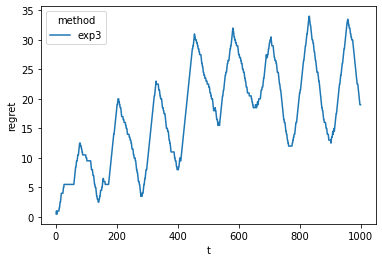

In [5]:
sns.lineplot(x="t",y="regret",data=df,hue="method")

<AxesSubplot:xlabel='t', ylabel='weight'>

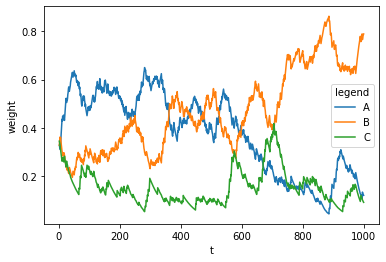

In [6]:
sns.lineplot(x="t",y="weight",data=df_weight,hue="legend")